# <기본 작업>
## 1. 데이터 가져오기, 데이터 변형

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# bring csv file
df = pd.read_csv('../data/train.csv')
# drop unusable col
df = df.drop(columns='조식메뉴')
df.rename(columns={'본사정원수': 'todtal_num'}, inplace=True)
df.rename(columns={'본사휴가자수': 'rest_num'}, inplace=True)
df.rename(columns={'본사출장자수': 'bt_num'}, inplace=True)
df.rename(columns={'본사시간외근무명령서승인건수': 'night_num'}, inplace=True)
df.rename(columns={'현본사소속재택근무자수': 'home_num'}, inplace=True)
df.rename(columns={'중식계': 'lunch_num'}, inplace=True)
df.rename(columns={'석식계': 'dinner_num'}, inplace=True)


# set the date into year, month, day
df.rename(columns={'일자': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])  
df['year'] = (df['date'].dt.year).astype(int)
df['month'] = (df['date'].dt.month).astype(int)
df['day'] = (df['date'].dt.day).astype(int)

df['weekday'] = df['date'].dt.day_name()


# get exact num of people
for col in ['total_num', 'rest_num', 'bt_num', 'night_num', 'home_num', 'lunch_num', 'home_num']:
    df[col] = (df[col]).astype(int)
df['real_num'] = df['total_num'] - (df['rest_num'] + df['bt_num'] + df['home_num'])
df['rate_lunch'] = df['lunch_num']/df['real_num'] * 100
df['rate_dinner'] = df['dinner_num']/df['real_num'] * 100
print(df.head())

# add weather cols
weather_df = pd.read_csv('../data/weather.csv')
weather_df['date'] = pd.to_datetime(weather_df['date'])

df = pd.merge(df, weather_df, on='date', how='left')

        date 요일  total_num  rest_num  bt_num  night_num  home_num  \
0 2016-02-01  월       2601        50     150        238         0   
1 2016-02-02  화       2601        50     173        319         0   
2 2016-02-03  수       2601        56     180        111         0   
3 2016-02-04  목       2601       104     220        355         0   
4 2016-02-05  금       2601       278     181         34         0   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴  lunch_num  dinner_num  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...       1039       331.0   
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...        867       560.0   
2  쌀밥/잡곡밥 (

## 2. 데이터 자료형 확인

In [250]:
df.dtypes

date             datetime64[ns]
요일                       object
total_num                 int64
rest_num                  int64
bt_num                    int64
night_num                 int64
home_num                  int64
중식메뉴                     object
석식메뉴                     object
lunch_num                 int64
dinner_num              float64
year                      int64
month                     int64
day                       int64
weekday                  object
real_num                  int64
rate_lunch              float64
rate_dinner             float64
평균기온(°C)                float64
최고기온(°C)                float64
최고기온 시각(hhmi)             int64
일강수량(mm)                float64
dtype: object

## 3. 결측치 확인(오류 누락 확인)
1. 현본사소속 재택 근무자수(코로나 영향으로 그 이전에는 거의 0)
2. 날씨 2018-10-19 평균기온 NaN -> 다른 날씨 데이터에서 해당 날짜 평균기온 항목만 가져옴

In [251]:
# 결측치 확인
# print(df.isnull().sum())
#print(df[df['평균기온(°C)'].isnull()])

# 결측치 채우기(다른 날씨 데이터 가져옴)
df.loc[659, ['평균기온(°C)']] = 9.3


## 4. 요약 통계
1. 수치형 col의 요약 통계: cnt, mean, std, min, max, median, var 등
2. 수치형 col의 boxplot

In [252]:
# 수치형 col의 요약 통계
num_df = df.loc[:, ['day', 'month', 'total_num', 'rest_num', 'bt_num', 'night_num', 'home_num', 'lunch_num', 'dinner_num', 'real_num', 'rate_lunch', 'rate_dinner']]
num_df.describe()

,day,month,total_num,rest_num,bt_num,night_num,home_num,lunch_num,dinner_num,real_num,rate_lunch,rate_dinner
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,15.947718,6.512033,2807.815768,157.913693,241.142739,274.117012,43.506224,890.334440,461.772614,2365.253112,37.645825,19.545992
std,8.650452,3.453906,171.264404,144.190572,43.532298,246.239651,109.937400,209.505057,139.179202,176.563062,8.511005,5.803207
min,1.000000,1.000000,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,1372.000000,14.364896,0.000000
25%,9.000000,4.000000,2645.000000,71.000000,217.000000,4.000000,0.000000,758.000000,406.000000,2281.000000,31.774126,17.201040
50%,16.000000,7.000000,2760.000000,105.000000,245.000000,299.000000,0.000000,879.000000,483.000000,2357.000000,37.193285,20.369004
75%,23.000000,9.000000,2962.000000,185.000000,272.000000,452.000000,0.000000,1032.000000,545.000000,2461.000000,43.200963,23.056653
max,31.000000,12.000000,3305.000000,1224.000000,378.000000,1044.000000,533.000000,1459.000000,905.000000,2921.000000,59.720343,38.026981


In [253]:
# 중앙값, 분산, 표준편차
print("<Median>\n", num_df.median())
print("<Var>\n",num_df.var())

<Median>
 day              16.000000
month             7.000000
total_num      2760.000000
rest_num        105.000000
bt_num          245.000000
night_num       299.000000
home_num          0.000000
lunch_num       879.000000
dinner_num      483.000000
real_num       2357.000000
rate_lunch       37.193285
rate_dinner      20.369004
dtype: float64
<Var>
 day               74.830321
month             11.929465
total_num      29331.495931
rest_num       20790.921116
bt_num          1895.061004
night_num      60633.965533
home_num       12086.231896
lunch_num      43892.368954
dinner_num     19370.850246
real_num       31174.514785
rate_lunch        72.437198
rate_dinner       33.677211
dtype: float64


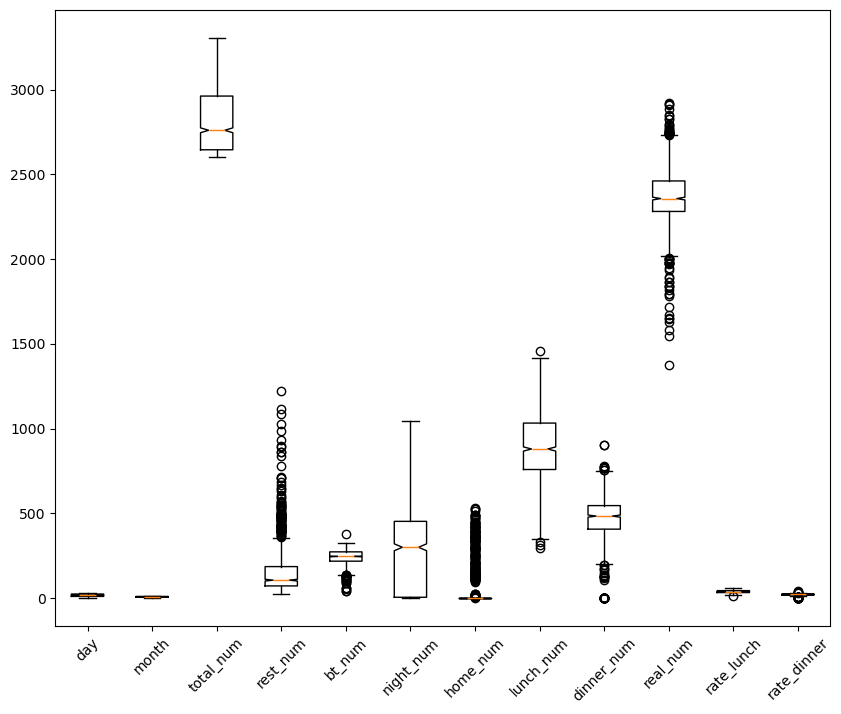

In [254]:
# boxplot
plt.figure(figsize=(10, 8))
plt.boxplot([num_df[col] for col in num_df.columns], notch=True)
plt.xticks(ticks=range(1, len(num_df.columns)+1), labels=num_df.columns, rotation=45)
plt.show()

## 5. 시각화
1. 월별 점심식사 비율: 여름휴가 기간, 월말이 적음
2. 요일별 점심식사 비율: 월요일이 가장 높고 금요일로 갈수록 낮아짐
3. 월별 저녁식사 비율: 
4. 요일별 저녁식사 비율: 수요일이 매우 낮다

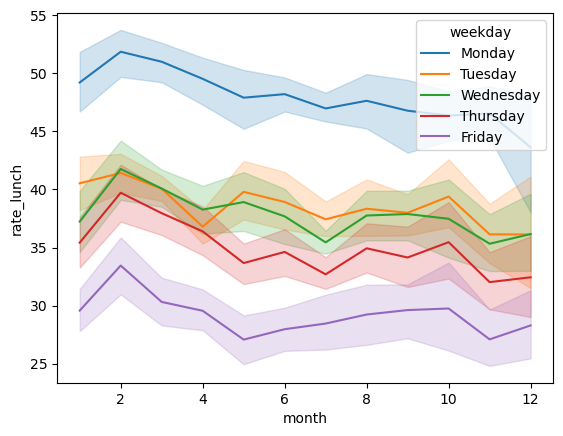

In [266]:
# 월별 점심식사 비율: 여름 휴가 기간, 월말이 적음
sns.lineplot(data=df, x=df['month'], y=df['rate_lunch'], hue="weekday")
#sns.lineplot(data=df, x=df['month'], y=df['rate_lunch'])
plt.show()

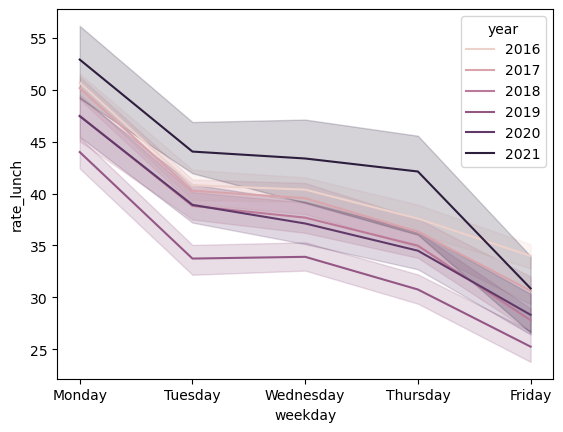

In [267]:
# 요일별 점심식사 비율
sns.lineplot(data=df, x=df['weekday'], y=df['rate_lunch'], hue='year')
plt.show()

<Axes: xlabel='weekday', ylabel='rate_dinner'>

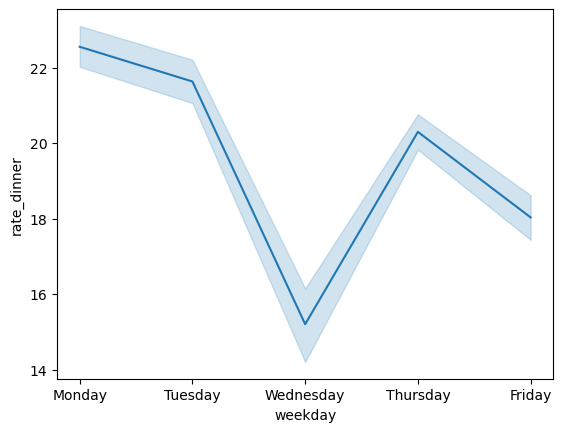

In [ ]:
# 요일별 저녁식사 비율
sns.lineplot(data=df, x=df['weekday'], y=df['rate_dinner'])

<Axes: xlabel='month', ylabel='rate_dinner'>

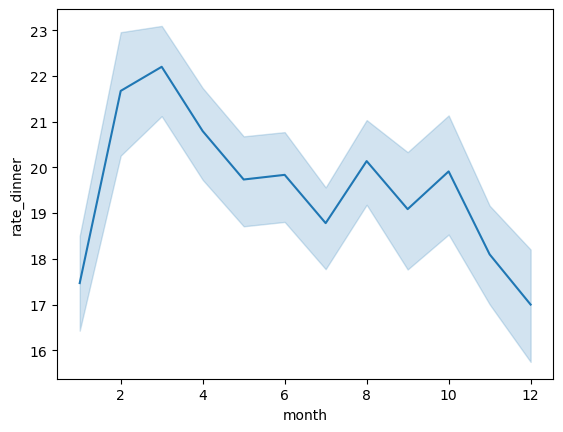

In [269]:
# 월별 저녁식사 비율
sns.lineplot(data=df, x=df['month'], y=df['rate_dinner'])